<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day20_PCA_and_LDA_on_face_dataset_and_classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA and LDA on face dataset and classification using SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:

# Load Faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=22)
X = faces_data.data
y = faces_data.target


In [ ]:

# PCA for dimensionality reduction
n_components_pca = 100
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X)


In [ ]:

# LDA for dimensionality reduction
n_components_lda = 10
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_lda = lda.fit_transform(X, y)


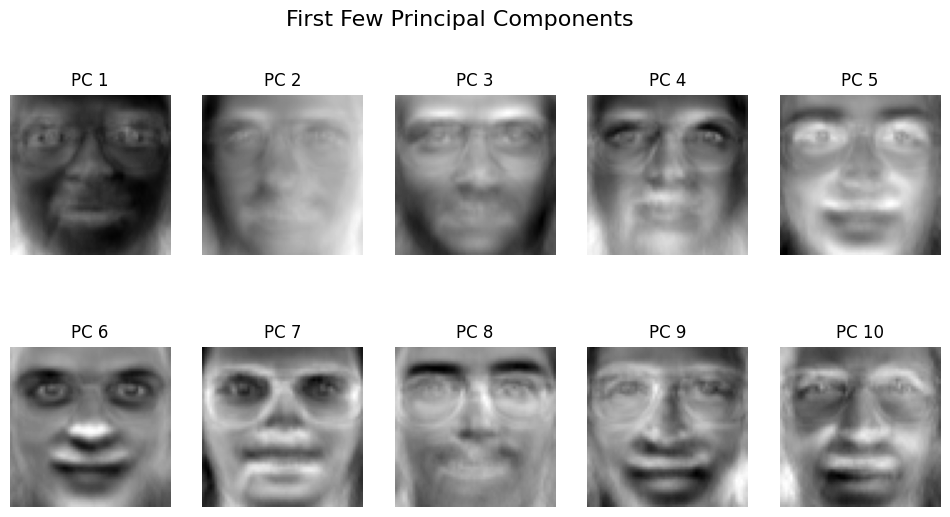

In [ ]:

# Visualize the first few principal components
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    plt.title("PC {}".format(i + 1))
    plt.axis("off")
plt.suptitle("First Few Principal Components", fontsize=16)
plt.show()


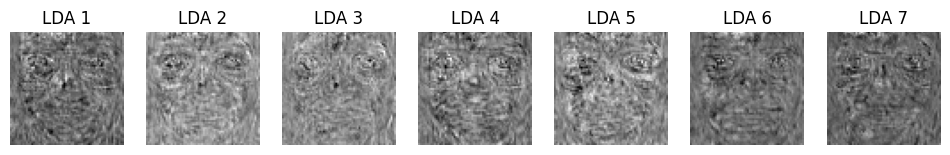

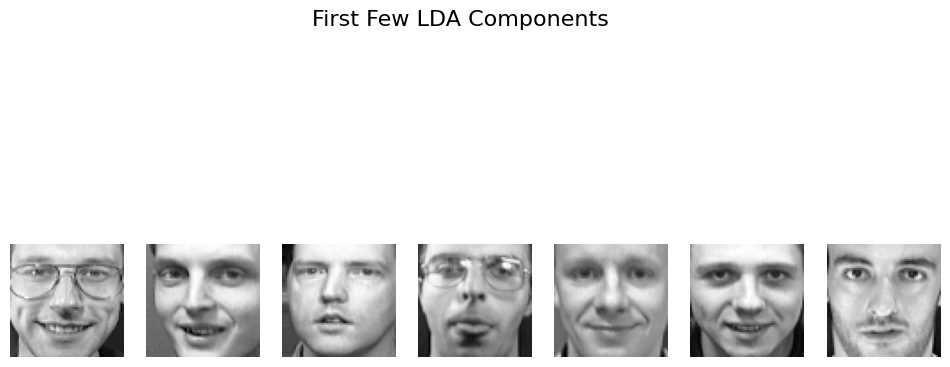

In [ ]:

# Visualize the first few LDA components
plt.figure(figsize=(12, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(lda.scalings_[:, i].reshape(64, 64), cmap='gray')
    plt.title("LDA {}".format(i + 1))
    plt.axis("off")

plt.figure(figsize=(12, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X[i].reshape(64, 64), cmap='gray')
    plt.axis("off")

plt.suptitle("Original Images", fontsize=16)
plt.suptitle("First Few LDA Components", fontsize=16)

plt.show()



# Lab Task: Use the PCA and LDA transformed feature and perform face classification using SVM classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_lda_train, X_lda_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_pca = SVC(kernel='linear', C=1.0)

# Train the classifier using PCA-transformed features
svm_pca.fit(X_pca_train, y_train)

# Create another SVM classifier
svm_lda = SVC(kernel='linear', C=1.0)

# Train the classifier using LDA-transformed features
svm_lda.fit(X_lda_train, y_train)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

# Predict using PCA-transformed features
y_pred_pca = svm_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

# Predict using LDA-transformed features
y_pred_lda = svm_lda.predict(X_lda_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy with LDA: {:.2f}%".format(accuracy_lda * 100))


Accuracy with PCA: 96.25%
Accuracy with LDA: 100.00%
